In [1]:
import os
import pandas as pd
import zipfile

/scratch/917272/ipykernel_2535109/4182074895.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
shared_drive_path = 'raw'

In [3]:
os.listdir(shared_drive_path)

['2004',
 '2016',
 '2022',
 '2010',
 '2013',
 '2021',
 '2008',
 '2009',
 '2017',
 '2023',
 '2007',
 '2012',
 '2018',
 '2015',
 '2024',
 '2011',
 '2006',
 '2014',
 '2003',
 '2020',
 '2019',
 '2005']

In [4]:
count = 0
for i in os.listdir(shared_drive_path):
    DIR = './raw/'+i
    count += len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
print(count)

13066


In [5]:
# List to hold individual DataFrames
def get_data(file_count=1, start_index=0):
    dataframes = []
    count = 0
    file_processed = 0  # Tracks total files processed

    # Walk through all subdirectories and files
    for subdir, dirs, files in os.walk(shared_drive_path):
        dirs.sort()
        files.sort()
        
        for filename in files:
            if filename.endswith('.zip'):
                zip_path = os.path.join(subdir, filename)
                #print(f"Processing {zip_path}")

                # Open the zip file
                with zipfile.ZipFile(zip_path, 'r') as zip_file:
                    # Iterate over each file in the zip
                    for file in zip_file.namelist():
                        # Skip files until reaching start_index
                        if file_processed < start_index:
                            file_processed += 1
                            continue
                            

                        # Process the file and add to DataFrame list
                        with zip_file.open(file) as my_file:
                            df = pd.read_csv(my_file, low_memory=False)
                            dataframes.append(df)
                            count += 1
                            print(f"Count: {count}")
                            file_processed += 1

                            # Stop if the batch size is reached
                            if count >= file_count:
                                combined_df = pd.concat(dataframes, ignore_index=True)
                                return combined_df, file_processed
        #print(f"Directory: {subdir}")

    # Concatenate all DataFrames if file_count wasn't reached (for the last batch)
    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        return combined_df, file_processed

    # Return None if no data was found
    return None, file_processed

In [6]:
start_index = 0
file_count = 13066

combined_df, next_start = get_data(file_count=file_count, start_index=start_index)

Count: 1
Count: 2
Count: 3
Count: 4
Count: 5
Count: 6
Count: 7
Count: 8
Count: 9
Count: 10
Count: 11
Count: 12
Count: 13
Count: 14
Count: 15
Count: 16
Count: 17
Count: 18
Count: 19
Count: 20
Count: 21
Count: 22
Count: 23
Count: 24
Count: 25
Count: 26
Count: 27
Count: 28
Count: 29
Count: 30
Count: 31
Count: 32
Count: 33
Count: 34
Count: 35
Count: 36
Count: 37
Count: 38
Count: 39
Count: 40
Count: 41
Count: 42
Count: 43
Count: 44
Count: 45
Count: 46
Count: 47
Count: 48
Count: 49
Count: 50
Count: 51
Count: 52
Count: 53
Count: 54
Count: 55
Count: 56
Count: 57
Count: 58
Count: 59
Count: 60
Count: 61
Count: 62
Count: 63
Count: 64
Count: 65
Count: 66
Count: 67
Count: 68
Count: 69
Count: 70
Count: 71
Count: 72
Count: 73
Count: 74
Count: 75
Count: 76
Count: 77
Count: 78
Count: 79
Count: 80
Count: 81
Count: 82
Count: 83
Count: 84
Count: 85
Count: 86
Count: 87
Count: 88
Count: 89
Count: 90
Count: 91
Count: 92
Count: 93
Count: 94
Count: 95
Count: 96
Count: 97
Count: 98
Count: 99
Count: 100
Count: 1

Count: 758
Count: 759
Count: 760
Count: 761
Count: 762
Count: 763
Count: 764
Count: 765
Count: 766
Count: 767
Count: 768
Count: 769
Count: 770
Count: 771
Count: 772
Count: 773
Count: 774
Count: 775
Count: 776
Count: 777
Count: 778
Count: 779
Count: 780
Count: 781
Count: 782
Count: 783
Count: 784
Count: 785
Count: 786
Count: 787
Count: 788
Count: 789
Count: 790
Count: 791
Count: 792
Count: 793
Count: 794
Count: 795
Count: 796
Count: 797
Count: 798
Count: 799
Count: 800
Count: 801
Count: 802
Count: 803
Count: 804
Count: 805
Count: 806
Count: 807
Count: 808
Count: 809
Count: 810
Count: 811
Count: 812
Count: 813
Count: 814
Count: 815
Count: 816
Count: 817
Count: 818
Count: 819
Count: 820
Count: 821
Count: 822
Count: 823
Count: 824
Count: 825
Count: 826
Count: 827
Count: 828
Count: 829
Count: 830
Count: 831
Count: 832
Count: 833
Count: 834
Count: 835
Count: 836
Count: 837
Count: 838
Count: 839
Count: 840
Count: 841
Count: 842
Count: 843
Count: 844
Count: 845
Count: 846
Count: 847
Count: 848

Count: 1463
Count: 1464
Count: 1465
Count: 1466
Count: 1467
Count: 1468
Count: 1469
Count: 1470
Count: 1471
Count: 1472
Count: 1473
Count: 1474
Count: 1475
Count: 1476
Count: 1477
Count: 1478
Count: 1479
Count: 1480
Count: 1481
Count: 1482
Count: 1483
Count: 1484
Count: 1485
Count: 1486
Count: 1487
Count: 1488
Count: 1489
Count: 1490
Count: 1491
Count: 1492
Count: 1493
Count: 1494
Count: 1495
Count: 1496
Count: 1497
Count: 1498
Count: 1499
Count: 1500
Count: 1501
Count: 1502
Count: 1503
Count: 1504
Count: 1505
Count: 1506
Count: 1507
Count: 1508
Count: 1509
Count: 1510
Count: 1511
Count: 1512
Count: 1513
Count: 1514
Count: 1515
Count: 1516
Count: 1517
Count: 1518
Count: 1519
Count: 1520
Count: 1521
Count: 1522
Count: 1523
Count: 1524
Count: 1525
Count: 1526
Count: 1527
Count: 1528
Count: 1529
Count: 1530
Count: 1531
Count: 1532
Count: 1533
Count: 1534
Count: 1535
Count: 1536
Count: 1537
Count: 1538
Count: 1539
Count: 1540
Count: 1541
Count: 1542
Count: 1543
Count: 1544
Count: 1545
Coun

Count: 2153
Count: 2154
Count: 2155
Count: 2156
Count: 2157
Count: 2158
Count: 2159
Count: 2160
Count: 2161
Count: 2162
Count: 2163
Count: 2164
Count: 2165
Count: 2166
Count: 2167
Count: 2168
Count: 2169
Count: 2170
Count: 2171
Count: 2172
Count: 2173
Count: 2174
Count: 2175
Count: 2176
Count: 2177
Count: 2178
Count: 2179
Count: 2180
Count: 2181
Count: 2182
Count: 2183
Count: 2184
Count: 2185
Count: 2186
Count: 2187
Count: 2188
Count: 2189
Count: 2190
Count: 2191
Count: 2192
Count: 2193
Count: 2194
Count: 2195
Count: 2196
Count: 2197
Count: 2198
Count: 2199
Count: 2200
Count: 2201
Count: 2202
Count: 2203
Count: 2204
Count: 2205
Count: 2206
Count: 2207
Count: 2208
Count: 2209
Count: 2210
Count: 2211
Count: 2212
Count: 2213
Count: 2214
Count: 2215
Count: 2216
Count: 2217
Count: 2218
Count: 2219
Count: 2220
Count: 2221
Count: 2222
Count: 2223
Count: 2224
Count: 2225
Count: 2226
Count: 2227
Count: 2228
Count: 2229
Count: 2230
Count: 2231
Count: 2232
Count: 2233
Count: 2234
Count: 2235
Coun

Count: 2838
Count: 2839
Count: 2840
Count: 2841
Count: 2842
Count: 2843
Count: 2844
Count: 2845
Count: 2846
Count: 2847
Count: 2848
Count: 2849
Count: 2850
Count: 2851
Count: 2852
Count: 2853
Count: 2854
Count: 2855
Count: 2856
Count: 2857
Count: 2858
Count: 2859
Count: 2860
Count: 2861
Count: 2862
Count: 2863
Count: 2864
Count: 2865
Count: 2866
Count: 2867
Count: 2868
Count: 2869
Count: 2870
Count: 2871
Count: 2872
Count: 2873
Count: 2874
Count: 2875
Count: 2876
Count: 2877
Count: 2878
Count: 2879
Count: 2880
Count: 2881
Count: 2882
Count: 2883
Count: 2884
Count: 2885
Count: 2886
Count: 2887
Count: 2888
Count: 2889
Count: 2890
Count: 2891
Count: 2892
Count: 2893
Count: 2894
Count: 2895
Count: 2896
Count: 2897
Count: 2898
Count: 2899
Count: 2900
Count: 2901
Count: 2902
Count: 2903
Count: 2904
Count: 2905
Count: 2906
Count: 2907
Count: 2908
Count: 2909
Count: 2910
Count: 2911
Count: 2912
Count: 2913
Count: 2914
Count: 2915
Count: 2916
Count: 2917
Count: 2918
Count: 2919
Count: 2920
Coun

Count: 3523
Count: 3524
Count: 3525
Count: 3526
Count: 3527
Count: 3528
Count: 3529
Count: 3530
Count: 3531
Count: 3532
Count: 3533
Count: 3534
Count: 3535
Count: 3536
Count: 3537
Count: 3538
Count: 3539
Count: 3540
Count: 3541
Count: 3542
Count: 3543
Count: 3544
Count: 3545
Count: 3546
Count: 3547
Count: 3548
Count: 3549
Count: 3550
Count: 3551
Count: 3552
Count: 3553
Count: 3554
Count: 3555
Count: 3556
Count: 3557
Count: 3558
Count: 3559
Count: 3560
Count: 3561
Count: 3562
Count: 3563
Count: 3564
Count: 3565
Count: 3566
Count: 3567
Count: 3568
Count: 3569
Count: 3570
Count: 3571
Count: 3572
Count: 3573
Count: 3574
Count: 3575
Count: 3576
Count: 3577
Count: 3578
Count: 3579
Count: 3580
Count: 3581
Count: 3582
Count: 3583
Count: 3584
Count: 3585
Count: 3586
Count: 3587
Count: 3588
Count: 3589
Count: 3590
Count: 3591
Count: 3592
Count: 3593
Count: 3594
Count: 3595
Count: 3596
Count: 3597
Count: 3598
Count: 3599
Count: 3600
Count: 3601
Count: 3602
Count: 3603
Count: 3604
Count: 3605
Coun

Count: 4206
Count: 4207
Count: 4208
Count: 4209
Count: 4210
Count: 4211
Count: 4212
Count: 4213
Count: 4214
Count: 4215
Count: 4216
Count: 4217
Count: 4218
Count: 4219
Count: 4220
Count: 4221
Count: 4222
Count: 4223
Count: 4224
Count: 4225
Count: 4226
Count: 4227
Count: 4228
Count: 4229
Count: 4230
Count: 4231
Count: 4232
Count: 4233
Count: 4234
Count: 4235
Count: 4236
Count: 4237
Count: 4238
Count: 4239
Count: 4240
Count: 4241
Count: 4242
Count: 4243
Count: 4244
Count: 4245
Count: 4246
Count: 4247
Count: 4248
Count: 4249
Count: 4250
Count: 4251
Count: 4252
Count: 4253
Count: 4254
Count: 4255
Count: 4256
Count: 4257
Count: 4258
Count: 4259
Count: 4260
Count: 4261
Count: 4262
Count: 4263
Count: 4264
Count: 4265
Count: 4266
Count: 4267
Count: 4268
Count: 4269
Count: 4270
Count: 4271
Count: 4272
Count: 4273
Count: 4274
Count: 4275
Count: 4276
Count: 4277
Count: 4278
Count: 4279
Count: 4280
Count: 4281
Count: 4282
Count: 4283
Count: 4284
Count: 4285
Count: 4286
Count: 4287
Count: 4288
Coun

Count: 4889
Count: 4890
Count: 4891
Count: 4892
Count: 4893
Count: 4894
Count: 4895
Count: 4896
Count: 4897
Count: 4898
Count: 4899
Count: 4900
Count: 4901
Count: 4902
Count: 4903
Count: 4904
Count: 4905
Count: 4906
Count: 4907
Count: 4908
Count: 4909
Count: 4910
Count: 4911
Count: 4912
Count: 4913
Count: 4914
Count: 4915
Count: 4916
Count: 4917
Count: 4918
Count: 4919
Count: 4920
Count: 4921
Count: 4922
Count: 4923
Count: 4924
Count: 4925
Count: 4926
Count: 4927
Count: 4928
Count: 4929
Count: 4930
Count: 4931
Count: 4932
Count: 4933
Count: 4934
Count: 4935
Count: 4936
Count: 4937
Count: 4938
Count: 4939
Count: 4940
Count: 4941
Count: 4942
Count: 4943
Count: 4944
Count: 4945
Count: 4946
Count: 4947
Count: 4948
Count: 4949
Count: 4950
Count: 4951
Count: 4952
Count: 4953
Count: 4954
Count: 4955
Count: 4956
Count: 4957
Count: 4958
Count: 4959
Count: 4960
Count: 4961
Count: 4962
Count: 4963
Count: 4964
Count: 4965
Count: 4966
Count: 4967
Count: 4968
Count: 4969
Count: 4970
Count: 4971
Coun

Count: 5573
Count: 5574
Count: 5575
Count: 5576
Count: 5577
Count: 5578
Count: 5579
Count: 5580
Count: 5581
Count: 5582
Count: 5583
Count: 5584
Count: 5585
Count: 5586
Count: 5587
Count: 5588
Count: 5589
Count: 5590
Count: 5591
Count: 5592
Count: 5593
Count: 5594
Count: 5595
Count: 5596
Count: 5597
Count: 5598
Count: 5599
Count: 5600
Count: 5601
Count: 5602
Count: 5603
Count: 5604
Count: 5605
Count: 5606
Count: 5607
Count: 5608
Count: 5609
Count: 5610
Count: 5611
Count: 5612
Count: 5613
Count: 5614
Count: 5615
Count: 5616
Count: 5617
Count: 5618
Count: 5619
Count: 5620
Count: 5621
Count: 5622
Count: 5623
Count: 5624
Count: 5625
Count: 5626
Count: 5627
Count: 5628
Count: 5629
Count: 5630
Count: 5631
Count: 5632
Count: 5633
Count: 5634
Count: 5635
Count: 5636
Count: 5637
Count: 5638
Count: 5639
Count: 5640
Count: 5641
Count: 5642
Count: 5643
Count: 5644
Count: 5645
Count: 5646
Count: 5647
Count: 5648
Count: 5649
Count: 5650
Count: 5651
Count: 5652
Count: 5653
Count: 5654
Count: 5655
Coun

Count: 6258
Count: 6259
Count: 6260
Count: 6261
Count: 6262
Count: 6263
Count: 6264
Count: 6265
Count: 6266
Count: 6267
Count: 6268
Count: 6269
Count: 6270
Count: 6271
Count: 6272
Count: 6273
Count: 6274
Count: 6275
Count: 6276
Count: 6277
Count: 6278
Count: 6279
Count: 6280
Count: 6281
Count: 6282
Count: 6283
Count: 6284
Count: 6285
Count: 6286
Count: 6287
Count: 6288
Count: 6289
Count: 6290
Count: 6291
Count: 6292
Count: 6293
Count: 6294
Count: 6295
Count: 6296
Count: 6297
Count: 6298
Count: 6299
Count: 6300
Count: 6301
Count: 6302
Count: 6303
Count: 6304
Count: 6305
Count: 6306
Count: 6307
Count: 6308
Count: 6309
Count: 6310
Count: 6311
Count: 6312
Count: 6313
Count: 6314
Count: 6315
Count: 6316
Count: 6317
Count: 6318
Count: 6319
Count: 6320
Count: 6321
Count: 6322
Count: 6323
Count: 6324
Count: 6325
Count: 6326
Count: 6327
Count: 6328
Count: 6329
Count: 6330
Count: 6331
Count: 6332
Count: 6333
Count: 6334
Count: 6335
Count: 6336
Count: 6337
Count: 6338
Count: 6339
Count: 6340
Coun

Count: 6941
Count: 6942
Count: 6943
Count: 6944
Count: 6945
Count: 6946
Count: 6947
Count: 6948
Count: 6949
Count: 6950
Count: 6951
Count: 6952
Count: 6953
Count: 6954
Count: 6955
Count: 6956
Count: 6957
Count: 6958
Count: 6959
Count: 6960
Count: 6961
Count: 6962
Count: 6963
Count: 6964
Count: 6965
Count: 6966
Count: 6967
Count: 6968
Count: 6969
Count: 6970
Count: 6971
Count: 6972
Count: 6973
Count: 6974
Count: 6975
Count: 6976
Count: 6977
Count: 6978
Count: 6979
Count: 6980
Count: 6981
Count: 6982
Count: 6983
Count: 6984
Count: 6985
Count: 6986
Count: 6987
Count: 6988
Count: 6989
Count: 6990
Count: 6991
Count: 6992
Count: 6993
Count: 6994
Count: 6995
Count: 6996
Count: 6997
Count: 6998
Count: 6999
Count: 7000
Count: 7001
Count: 7002
Count: 7003
Count: 7004
Count: 7005
Count: 7006
Count: 7007
Count: 7008
Count: 7009
Count: 7010
Count: 7011
Count: 7012
Count: 7013
Count: 7014
Count: 7015
Count: 7016
Count: 7017
Count: 7018
Count: 7019
Count: 7020
Count: 7021
Count: 7022
Count: 7023
Coun

Count: 7626
Count: 7627
Count: 7628
Count: 7629
Count: 7630
Count: 7631
Count: 7632
Count: 7633
Count: 7634
Count: 7635
Count: 7636
Count: 7637
Count: 7638
Count: 7639
Count: 7640
Count: 7641
Count: 7642
Count: 7643
Count: 7644
Count: 7645
Count: 7646
Count: 7647
Count: 7648
Count: 7649
Count: 7650
Count: 7651
Count: 7652
Count: 7653
Count: 7654
Count: 7655
Count: 7656
Count: 7657
Count: 7658
Count: 7659
Count: 7660
Count: 7661
Count: 7662
Count: 7663
Count: 7664
Count: 7665
Count: 7666
Count: 7667
Count: 7668
Count: 7669
Count: 7670
Count: 7671
Count: 7672
Count: 7673
Count: 7674
Count: 7675
Count: 7676
Count: 7677
Count: 7678
Count: 7679
Count: 7680
Count: 7681
Count: 7682
Count: 7683
Count: 7684
Count: 7685
Count: 7686
Count: 7687
Count: 7688
Count: 7689
Count: 7690
Count: 7691
Count: 7692
Count: 7693
Count: 7694
Count: 7695
Count: 7696
Count: 7697
Count: 7698
Count: 7699
Count: 7700
Count: 7701
Count: 7702
Count: 7703
Count: 7704
Count: 7705
Count: 7706
Count: 7707
Count: 7708
Coun

Count: 8310
Count: 8311
Count: 8312
Count: 8313
Count: 8314
Count: 8315
Count: 8316
Count: 8317
Count: 8318
Count: 8319
Count: 8320
Count: 8321
Count: 8322
Count: 8323
Count: 8324
Count: 8325
Count: 8326
Count: 8327
Count: 8328
Count: 8329
Count: 8330
Count: 8331
Count: 8332
Count: 8333
Count: 8334
Count: 8335
Count: 8336
Count: 8337
Count: 8338
Count: 8339
Count: 8340
Count: 8341
Count: 8342
Count: 8343
Count: 8344
Count: 8345
Count: 8346
Count: 8347
Count: 8348
Count: 8349
Count: 8350
Count: 8351
Count: 8352
Count: 8353
Count: 8354
Count: 8355
Count: 8356
Count: 8357
Count: 8358
Count: 8359
Count: 8360
Count: 8361
Count: 8362
Count: 8363
Count: 8364
Count: 8365
Count: 8366
Count: 8367
Count: 8368
Count: 8369
Count: 8370
Count: 8371
Count: 8372
Count: 8373
Count: 8374
Count: 8375
Count: 8376
Count: 8377
Count: 8378
Count: 8379
Count: 8380
Count: 8381
Count: 8382
Count: 8383
Count: 8384
Count: 8385
Count: 8386
Count: 8387
Count: 8388
Count: 8389
Count: 8390
Count: 8391
Count: 8392
Coun

Count: 8997
Count: 8998
Count: 8999
Count: 9000
Count: 9001
Count: 9002
Count: 9003
Count: 9004
Count: 9005
Count: 9006
Count: 9007
Count: 9008
Count: 9009
Count: 9010
Count: 9011
Count: 9012
Count: 9013
Count: 9014
Count: 9015
Count: 9016
Count: 9017
Count: 9018
Count: 9019
Count: 9020
Count: 9021
Count: 9022
Count: 9023
Count: 9024
Count: 9025
Count: 9026
Count: 9027
Count: 9028
Count: 9029
Count: 9030
Count: 9031
Count: 9032
Count: 9033
Count: 9034
Count: 9035
Count: 9036
Count: 9037
Count: 9038
Count: 9039
Count: 9040
Count: 9041
Count: 9042
Count: 9043
Count: 9044
Count: 9045
Count: 9046
Count: 9047
Count: 9048
Count: 9049
Count: 9050
Count: 9051
Count: 9052
Count: 9053
Count: 9054
Count: 9055
Count: 9056
Count: 9057
Count: 9058
Count: 9059
Count: 9060
Count: 9061
Count: 9062
Count: 9063
Count: 9064
Count: 9065
Count: 9066
Count: 9067
Count: 9068
Count: 9069
Count: 9070
Count: 9071
Count: 9072
Count: 9073
Count: 9074
Count: 9075
Count: 9076
Count: 9077
Count: 9078
Count: 9079
Coun

Count: 9680
Count: 9681
Count: 9682
Count: 9683
Count: 9684
Count: 9685
Count: 9686
Count: 9687
Count: 9688
Count: 9689
Count: 9690
Count: 9691
Count: 9692
Count: 9693
Count: 9694
Count: 9695
Count: 9696
Count: 9697
Count: 9698
Count: 9699
Count: 9700
Count: 9701
Count: 9702
Count: 9703
Count: 9704
Count: 9705
Count: 9706
Count: 9707
Count: 9708
Count: 9709
Count: 9710
Count: 9711
Count: 9712
Count: 9713
Count: 9714
Count: 9715
Count: 9716
Count: 9717
Count: 9718
Count: 9719
Count: 9720
Count: 9721
Count: 9722
Count: 9723
Count: 9724
Count: 9725
Count: 9726
Count: 9727
Count: 9728
Count: 9729
Count: 9730
Count: 9731
Count: 9732
Count: 9733
Count: 9734
Count: 9735
Count: 9736
Count: 9737
Count: 9738
Count: 9739
Count: 9740
Count: 9741
Count: 9742
Count: 9743
Count: 9744
Count: 9745
Count: 9746
Count: 9747
Count: 9748
Count: 9749
Count: 9750
Count: 9751
Count: 9752
Count: 9753
Count: 9754
Count: 9755
Count: 9756
Count: 9757
Count: 9758
Count: 9759
Count: 9760
Count: 9761
Count: 9762
Coun

Count: 10335
Count: 10336
Count: 10337
Count: 10338
Count: 10339
Count: 10340
Count: 10341
Count: 10342
Count: 10343
Count: 10344
Count: 10345
Count: 10346
Count: 10347
Count: 10348
Count: 10349
Count: 10350
Count: 10351
Count: 10352
Count: 10353
Count: 10354
Count: 10355
Count: 10356
Count: 10357
Count: 10358
Count: 10359
Count: 10360
Count: 10361
Count: 10362
Count: 10363
Count: 10364
Count: 10365
Count: 10366
Count: 10367
Count: 10368
Count: 10369
Count: 10370
Count: 10371
Count: 10372
Count: 10373
Count: 10374
Count: 10375
Count: 10376
Count: 10377
Count: 10378
Count: 10379
Count: 10380
Count: 10381
Count: 10382
Count: 10383
Count: 10384
Count: 10385
Count: 10386
Count: 10387
Count: 10388
Count: 10389
Count: 10390
Count: 10391
Count: 10392
Count: 10393
Count: 10394
Count: 10395
Count: 10396
Count: 10397
Count: 10398
Count: 10399
Count: 10400
Count: 10401
Count: 10402
Count: 10403
Count: 10404
Count: 10405
Count: 10406
Count: 10407
Count: 10408
Count: 10409
Count: 10410
Count: 10411

Count: 10967
Count: 10968
Count: 10969
Count: 10970
Count: 10971
Count: 10972
Count: 10973
Count: 10974
Count: 10975
Count: 10976
Count: 10977
Count: 10978
Count: 10979
Count: 10980
Count: 10981
Count: 10982
Count: 10983
Count: 10984
Count: 10985
Count: 10986
Count: 10987
Count: 10988
Count: 10989
Count: 10990
Count: 10991
Count: 10992
Count: 10993
Count: 10994
Count: 10995
Count: 10996
Count: 10997
Count: 10998
Count: 10999
Count: 11000
Count: 11001
Count: 11002
Count: 11003
Count: 11004
Count: 11005
Count: 11006
Count: 11007
Count: 11008
Count: 11009
Count: 11010
Count: 11011
Count: 11012
Count: 11013
Count: 11014
Count: 11015
Count: 11016
Count: 11017
Count: 11018
Count: 11019
Count: 11020
Count: 11021
Count: 11022
Count: 11023
Count: 11024
Count: 11025
Count: 11026
Count: 11027
Count: 11028
Count: 11029
Count: 11030
Count: 11031
Count: 11032
Count: 11033
Count: 11034
Count: 11035
Count: 11036
Count: 11037
Count: 11038
Count: 11039
Count: 11040
Count: 11041
Count: 11042
Count: 11043

Count: 11599
Count: 11600
Count: 11601
Count: 11602
Count: 11603
Count: 11604
Count: 11605
Count: 11606
Count: 11607
Count: 11608
Count: 11609
Count: 11610
Count: 11611
Count: 11612
Count: 11613
Count: 11614
Count: 11615
Count: 11616
Count: 11617
Count: 11618
Count: 11619
Count: 11620
Count: 11621
Count: 11622
Count: 11623
Count: 11624
Count: 11625
Count: 11626
Count: 11627
Count: 11628
Count: 11629
Count: 11630
Count: 11631
Count: 11632
Count: 11633
Count: 11634
Count: 11635
Count: 11636
Count: 11637
Count: 11638
Count: 11639
Count: 11640
Count: 11641
Count: 11642
Count: 11643
Count: 11644
Count: 11645
Count: 11646
Count: 11647
Count: 11648
Count: 11649
Count: 11650
Count: 11651
Count: 11652
Count: 11653
Count: 11654
Count: 11655
Count: 11656
Count: 11657
Count: 11658
Count: 11659
Count: 11660
Count: 11661
Count: 11662
Count: 11663
Count: 11664
Count: 11665
Count: 11666
Count: 11667
Count: 11668
Count: 11669
Count: 11670
Count: 11671
Count: 11672
Count: 11673
Count: 11674
Count: 11675

Count: 12237
Count: 12238
Count: 12239
Count: 12240
Count: 12241
Count: 12242
Count: 12243
Count: 12244
Count: 12245
Count: 12246
Count: 12247
Count: 12248
Count: 12249
Count: 12250
Count: 12251
Count: 12252
Count: 12253
Count: 12254
Count: 12255
Count: 12256
Count: 12257
Count: 12258
Count: 12259
Count: 12260
Count: 12261
Count: 12262
Count: 12263
Count: 12264
Count: 12265
Count: 12266
Count: 12267
Count: 12268
Count: 12269
Count: 12270
Count: 12271
Count: 12272
Count: 12273
Count: 12274
Count: 12275
Count: 12276
Count: 12277
Count: 12278
Count: 12279
Count: 12280
Count: 12281
Count: 12282
Count: 12283
Count: 12284
Count: 12285
Count: 12286
Count: 12287
Count: 12288
Count: 12289
Count: 12290
Count: 12291
Count: 12292
Count: 12293
Count: 12294
Count: 12295
Count: 12296
Count: 12297
Count: 12298
Count: 12299
Count: 12300
Count: 12301
Count: 12302
Count: 12303
Count: 12304
Count: 12305
Count: 12306
Count: 12307
Count: 12308
Count: 12309
Count: 12310
Count: 12311
Count: 12312
Count: 12313

Count: 12868
Count: 12869
Count: 12870
Count: 12871
Count: 12872
Count: 12873
Count: 12874
Count: 12875
Count: 12876
Count: 12877
Count: 12878
Count: 12879
Count: 12880
Count: 12881
Count: 12882
Count: 12883
Count: 12884
Count: 12885
Count: 12886
Count: 12887
Count: 12888
Count: 12889
Count: 12890
Count: 12891
Count: 12892
Count: 12893
Count: 12894
Count: 12895
Count: 12896
Count: 12897
Count: 12898
Count: 12899
Count: 12900
Count: 12901
Count: 12902
Count: 12903
Count: 12904
Count: 12905
Count: 12906
Count: 12907
Count: 12908
Count: 12909
Count: 12910
Count: 12911
Count: 12912
Count: 12913
Count: 12914
Count: 12915
Count: 12916
Count: 12917
Count: 12918
Count: 12919
Count: 12920
Count: 12921
Count: 12922
Count: 12923
Count: 12924
Count: 12925
Count: 12926
Count: 12927
Count: 12928
Count: 12929
Count: 12930
Count: 12931
Count: 12932
Count: 12933
Count: 12934
Count: 12935
Count: 12936
Count: 12937
Count: 12938
Count: 12939
Count: 12940
Count: 12941
Count: 12942
Count: 12943
Count: 12944

In [7]:
next_start

13064

In [8]:
combined_df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_SEQ_ID,...,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2003,4,10,1,3,19805,AA,1059902,30599,1129802,...,624.0,-2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2003,4,10,1,3,19805,AA,1129802,30194,1059902,...,1045.0,-2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2003,4,10,1,3,19805,AA,1059902,30599,1129802,...,1258.0,-6.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2003,4,10,1,3,19805,AA,1221701,30255,1129802,...,1701.0,-5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2003,4,10,1,3,19805,AA,1129802,30194,1221701,...,1441.0,-5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [9]:
combined_df.shape

(259987908, 23)

In [10]:
combined_df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID',
       'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW',
       'DEP_DEL15', 'CANCELLED', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [11]:
combined_df_no_na = combined_df[combined_df['DEP_DEL15'].notna()]
combined_df_no_na.shape

(255258469, 23)

In [12]:
combined_df_no_na.to_csv('complete_dataset.csv', index=False)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Define your TP, FP, TN, and FN values
TN = 7505761
FP = 263598
TP = 33262357
FN = 10825

true_TP = np.zeros(TP, dtype = float)
pred_TP = np.zeros(TP, dtype = float)

true_FP = np.zeros(FP, dtype = float)
pred_FP = np.ones(FP, dtype = float)

true_TN = np.ones(TN, dtype = float)
pred_TN = np.ones(TN, dtype = float)

true_FN = np.ones(FN, dtype = float)
pred_FN = np.zeros(FN, dtype = float)

y_test = np.concatenate([true_TP, true_FP, true_TN, true_FN])
y_pred = np.concatenate([pred_TP, pred_FP, pred_TN, pred_FN])


In [30]:
y_test.shape

(41042541,)

In [31]:
y_pred.shape

(41042541,)

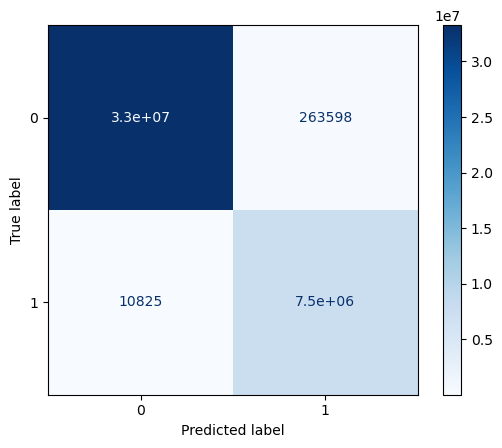

In [5]:
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change the colormap to something else if you like
plt.show()